# Random Forest Assignment

## Use RandomForest for the Iris dataset
- dataset: 'Iris.csv'


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('Iris.csv')

# 1. Data Exploration

In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [5]:
labels = dataset['Species'].unique()
features = dataset.drop(['Id','Species'], axis=1).columns
print(labels)
print(features)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


In [6]:
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

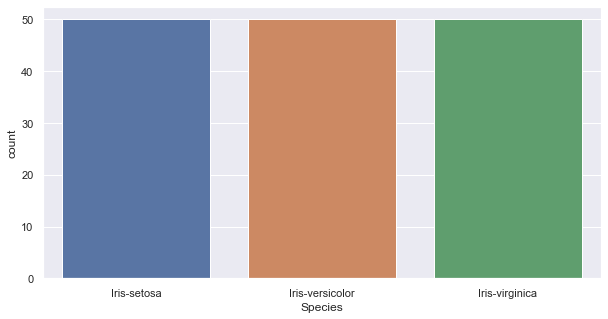

In [7]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(x="Species", data=dataset)
plt.show()

## 1.1. Continous features data range

In [8]:
# Range of features
def print_data_range(data, labels, features, isreturn=False):
    return_range = []
    for feature in features:
        data_range = []
        for label in labels:
            data_range.append([label, data[data['Species'] == label][feature].min(), data[data['Species'] == label][feature].max()])
        res = pd.DataFrame(data_range, columns=['Species', 'min', 'max'])
        if not isreturn:
            print('==========================================')
            print(feature)
            print('-'*len(feature))
            print(res)
            print('==========================================')
        if isreturn:
            return_range.append(res.drop('Species', axis=1))
    if isreturn:
        return return_range, features
        
print_data_range(dataset, labels, list(dataset.drop(['Id', 'Species'], axis=1).columns))
data_range, data_features = print_data_range(dataset, labels, list(dataset.drop(['Id', 'Species'], axis=1).columns), True)

SepalLengthCm
-------------
           Species  min  max
0      Iris-setosa  4.3  5.8
1  Iris-versicolor  4.9  7.0
2   Iris-virginica  4.9  7.9
SepalWidthCm
------------
           Species  min  max
0      Iris-setosa  2.3  4.4
1  Iris-versicolor  2.0  3.4
2   Iris-virginica  2.2  3.8
PetalLengthCm
-------------
           Species  min  max
0      Iris-setosa  1.0  1.9
1  Iris-versicolor  3.0  5.1
2   Iris-virginica  4.5  6.9
PetalWidthCm
------------
           Species  min  max
0      Iris-setosa  0.1  0.6
1  Iris-versicolor  1.0  1.8
2   Iris-virginica  1.4  2.5


## 1.2. Visualization

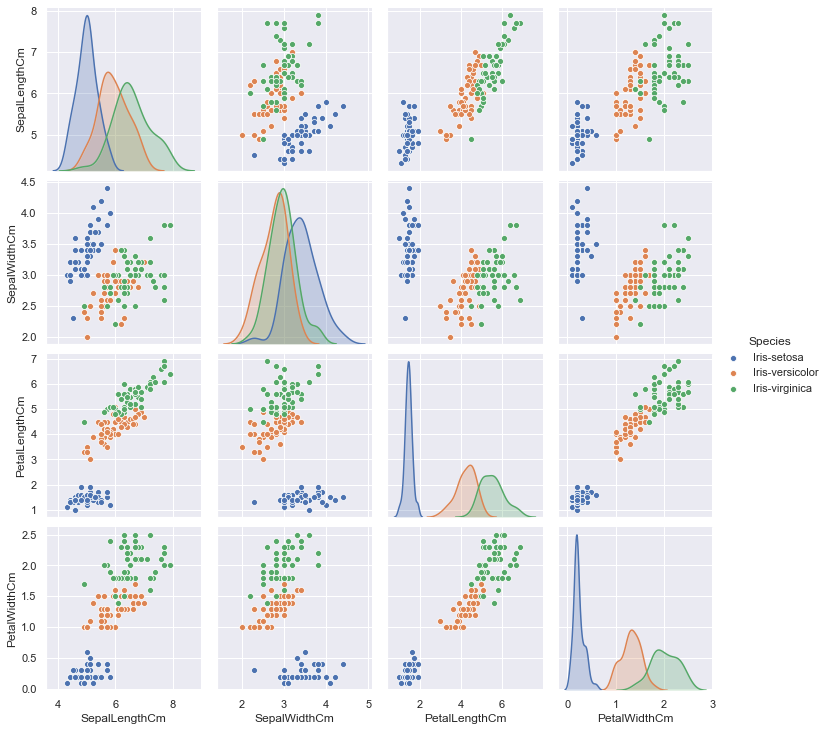

In [9]:
sns.pairplot(dataset.drop('Id', axis=1), hue = 'Species', kind='scatter')

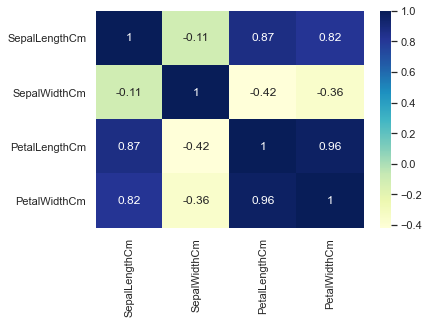

In [10]:
sns.heatmap(dataset.drop(['Id','Species'], axis = 1).corr(), cmap="YlGnBu", annot=True)

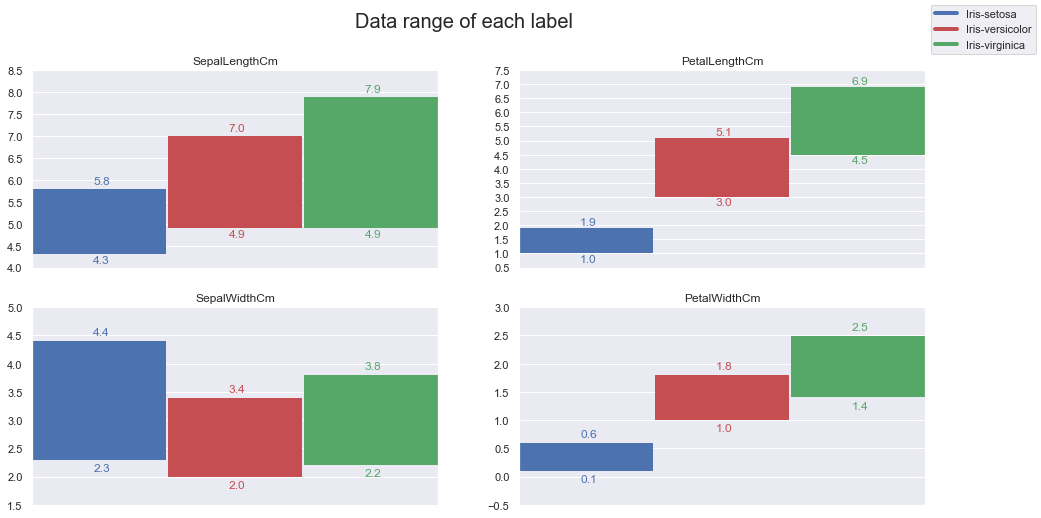

In [11]:
from matplotlib.lines import Line2D

colors = ['b', 'r', 'g']
custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
                Line2D([0], [0], color=colors[1], lw=4),
                Line2D([0], [0], color=colors[2], lw=4)]

fig, ax = plt.subplots(2, 2, figsize=(16, 8))

for idx in range(3):
    m0 = np.meshgrid(np.arange(idx, idx+1, 0.01), np.arange(data_range[0]['min'][idx], data_range[0]['max'][idx], 0.01))
    z0 = np.zeros((m0[0].shape))
    m1 = np.meshgrid(np.arange(idx, idx+1, 0.01), np.arange(data_range[1]['min'][idx], data_range[1]['max'][idx], 0.01))
    z1 = np.zeros((m1[0].shape))
    m2 = np.meshgrid(np.arange(idx, idx+1, 0.01), np.arange(data_range[2]['min'][idx], data_range[2]['max'][idx], 0.01))
    z2 = np.zeros((m2[0].shape))
    m3 = np.meshgrid(np.arange(idx, idx+1, 0.01), np.arange(data_range[3]['min'][idx], data_range[3]['max'][idx], 0.01))
    z3 = np.zeros((m3[0].shape))
    
    ax[0, 0].contourf(m0[0], m0[1], z0, colors=colors[idx])
    ax[0, 0].annotate(data_range[0]['min'][idx], (idx+0.45, data_range[0]['min'][idx]-0.2), color=colors[idx])
    ax[0, 0].annotate(data_range[0]['max'][idx], (idx+0.45, data_range[0]['max'][idx]+0.1), color=colors[idx])
    ax[1, 0].contourf(m1[0], m1[1], z1, colors=colors[idx])
    ax[1, 0].annotate(data_range[1]['min'][idx], (idx+0.45, data_range[1]['min'][idx]-0.2), color=colors[idx])
    ax[1, 0].annotate(data_range[1]['max'][idx], (idx+0.45, data_range[1]['max'][idx]+0.1), color=colors[idx])
    ax[0, 1].contourf(m2[0], m2[1], z2, colors=colors[idx])
    ax[0, 1].annotate(data_range[2]['min'][idx], (idx+0.45, data_range[2]['min'][idx]-0.3), color=colors[idx])
    ax[0, 1].annotate(data_range[2]['max'][idx], (idx+0.45, data_range[2]['max'][idx]+0.1), color=colors[idx])
    ax[1, 1].contourf(m3[0], m3[1], z3, colors=colors[idx])
    ax[1, 1].annotate(data_range[3]['min'][idx], (idx+0.45, data_range[3]['min'][idx]-0.2), color=colors[idx])
    ax[1, 1].annotate(data_range[3]['max'][idx], (idx+0.45, data_range[3]['max'][idx]+0.1), color=colors[idx])

ax[0, 0].set_title(data_features[0])
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks(np.arange(4,8.6,0.5))
ax[1, 0].set_title(data_features[1])
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks(np.arange(1.5,5.1,0.5))
ax[0, 1].set_title(data_features[2])
ax[0, 1].set_xticks([])
ax[0, 1].set_yticks(np.arange(0.5,7.6,0.5))
ax[1, 1].set_title(data_features[3])
ax[1, 1].set_xticks([])
ax[1, 1].set_yticks(np.arange(-0.5,3.1,0.5))

fig.suptitle('Data range of each label', fontsize=20)
fig.legend(custom_lines, labels, loc='upper right')

# 2. Data Processing

In [12]:
# Dividing dataset into features and encoded labels
X = dataset.drop(['Id', 'Species'], axis=1)
y = dataset['Species'].apply(lambda x: list(labels).index(x))

In [13]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

## Splitting data

In [15]:
# Splitting into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [16]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
114,5.8,2.8,5.1,2.4
40,5.0,3.5,1.3,0.3
102,7.1,3.0,5.9,2.1
55,5.7,2.8,4.5,1.3
32,5.2,4.1,1.5,0.1


In [17]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
114,5.8,2.8,5.1,2.4
40,5.0,3.5,1.3,0.3
102,7.1,3.0,5.9,2.1
55,5.7,2.8,4.5,1.3
32,5.2,4.1,1.5,0.1


# 3. RandomForestClassifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

## Creating class

In [19]:
class RandomForest():
    def __init__(self, criterion, random_state=0):
        self.random_forest = RandomForestClassifier(n_estimators=100, criterion=criterion, random_state=random_state, n_jobs=-1)
        self.y_pred = None
        
    # Fitting the model
    def fit(self, X_train, y_train):
        self.random_forest.fit(np.array(X_train), np.array(y_train))
        print(self.random_forest)
        
    # Predicting on the test set
    def predict(self, X_test):
        self.y_pred = self.random_forest.predict(np.array(X_test))
        print(self.y_pred)
    
    # Evaluating the model
    def evaluate(self, y_test):
        # Confusion matrix
        cm = confusion_matrix(y_test, self.y_pred)
        
        # Classification report
        cr = classification_report(y_test, self.y_pred, zero_division=0)
        
        # Using accuracy_score
        accuracy = accuracy_score(y_test, self.y_pred)*100
        
        print('Confusion matrix: ')
        print(cm)
        print(cr) 
        print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

## 3.1. Using entropy

### 3.1.1. Fitting the model

In [20]:
# Random Forest
entr_random_forest = RandomForest('entropy')

# Fitting the model
entr_random_forest.fit(np.array(X_train), np.array(y_train))

RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=0)


### 3.1.2. Prediction

In [21]:
# Predicting on the test set
entr_random_forest.predict(X_test)

[0 1 0 1 2 2 1 2 2 2 1 0 0 0 1 2 2 1 1 1 2 0 1 1 0 2 2 2 1 2]


### 3.1.3. Evaluating

In [22]:
# Evaluating the model
entr_random_forest.evaluate(y_test)

Confusion matrix: 
[[ 7  0  0]
 [ 0 11  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy of our model is equal 100.0 %.


### 3.1.4. Important Features

In [23]:
entr_feature_imp = pd.Series(entr_random_forest.random_forest.feature_importances_,index=features).sort_values(ascending=False)
entr_feature_imp

PetalLengthCm    0.465436
PetalWidthCm     0.414435
SepalLengthCm    0.088540
SepalWidthCm     0.031590
dtype: float64

In [24]:
entr_not_imp_feature = entr_feature_imp.keys()[entr_feature_imp.argmin()]
entr_not_imp_feature

'SepalWidthCm'

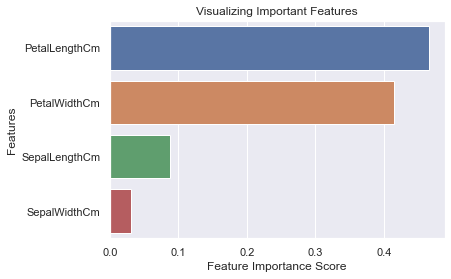

In [25]:
# Creating a bar plot
sns.barplot(x=entr_feature_imp, y=entr_feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## 3.1.5. Developing the model based on Selected Features

In [26]:
# Removing SepalWithCm feature
X_train_selected = X_train.drop(entr_not_imp_feature, axis = 1)
X_test_selected = X_test.drop(entr_not_imp_feature, axis = 1)
X_train_selected.head()

,SepalLengthCm,PetalLengthCm,PetalWidthCm
114,5.8,5.1,2.4
40,5.0,1.3,0.3
102,7.1,5.9,2.1
55,5.7,4.5,1.3
32,5.2,1.5,0.1


In [27]:
# New model with selected features
entr_random_forest_2 = RandomForest('entropy')

# Fitting the model
entr_random_forest_2.fit(np.array(X_train_selected), np.array(y_train))

# Predicting on the test set
entr_random_forest_2.predict(X_test_selected)

# Evaluating the model
entr_random_forest_2.evaluate(y_test)

RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=0)
[0 1 0 1 2 2 1 2 2 2 1 0 0 0 1 2 2 1 1 1 2 0 1 1 0 2 2 2 1 2]
Confusion matrix: 
[[ 7  0  0]
 [ 0 11  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy of our model is equal 100.0 %.


## 3.2. Using gini

### 3.2.1. Fitting the model

In [28]:
# Random Forest
gini_random_forest = RandomForest('gini')

# Fitting the model
gini_random_forest.fit(np.array(X_train), np.array(y_train))

RandomForestClassifier(n_jobs=-1, random_state=0)


### 3.2.2. Prediction

In [29]:
# Predicting on the test set
gini_random_forest.predict(X_test)

[0 1 0 1 2 2 1 2 2 2 1 0 0 0 1 2 2 1 1 1 2 0 1 1 0 2 2 2 1 2]


### 3.2.3. Evaluating

In [30]:
# Evaluating the model
gini_random_forest.evaluate(y_test)

Confusion matrix: 
[[ 7  0  0]
 [ 0 11  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy of our model is equal 100.0 %.


### 3.2.4. Important Features

In [31]:
gini_feature_imp = pd.Series(gini_random_forest.random_forest.feature_importances_,index=features).sort_values(ascending=False)
gini_feature_imp

PetalLengthCm    0.461944
PetalWidthCm     0.415929
SepalLengthCm    0.091239
SepalWidthCm     0.030887
dtype: float64

In [32]:
gini_not_imp_feature = gini_feature_imp.keys()[gini_feature_imp.argmin()]
gini_not_imp_feature

'SepalWidthCm'

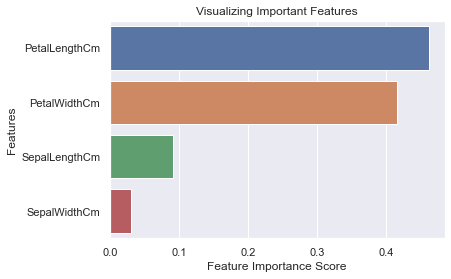

In [33]:
# Creating a bar plot
sns.barplot(x=gini_feature_imp, y=gini_feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## 3.2.5. Developing the model based on Selected Features

In [34]:
# Removing SepalWithCm feature
X_train_selected = X_train.drop(gini_not_imp_feature, axis = 1)
X_test_selected = X_test.drop(gini_not_imp_feature, axis = 1)
X_train_selected.head()

,SepalLengthCm,PetalLengthCm,PetalWidthCm
114,5.8,5.1,2.4
40,5.0,1.3,0.3
102,7.1,5.9,2.1
55,5.7,4.5,1.3
32,5.2,1.5,0.1


In [35]:
# New model with selected features
gini_random_forest_2 = RandomForest('gini')

# Fitting the model
gini_random_forest_2.fit(np.array(X_train_selected), np.array(y_train))

# Predicting on the test set
gini_random_forest_2.predict(X_test_selected)

# Evaluating the model
gini_random_forest_2.evaluate(y_test)

RandomForestClassifier(n_jobs=-1, random_state=0)
[0 1 0 1 2 2 1 2 2 2 1 0 0 0 1 2 2 1 1 1 2 0 1 1 0 2 2 2 1 2]
Confusion matrix: 
[[ 7  0  0]
 [ 0 11  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy of our model is equal 100.0 %.
